In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(100)

import scipy as sp
from scipy.stats import t

import statsmodels.stats.diagnostic as smd # Диагностика моделей
import statsmodels.formula.api as smf # Модели
import statsmodels.api as sm
import statsmodels.stats.api as sms # Тесты
import statsmodels.stats.stattools as smst # ещё тесты

import unicodedata

# Нормальность остатков

* $H_0: eps ~ \sim N(0, \sigma^2)$
* $H_1: иначе$

Text(0.5, 1.0, 'Exponential residuals')

<Figure size 1000x1000 with 0 Axes>

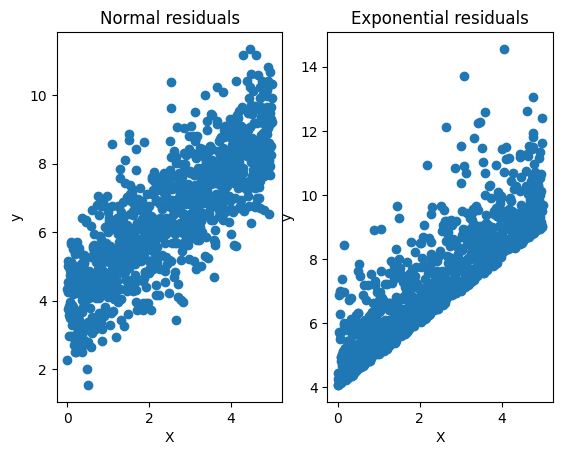

In [3]:
x = np.linspace(0,5,1000)

y1 = 4 + x +np.random.normal(size=x.shape)
y2 =  4 + x +np.random.exponential(size=x.shape)

plt.figure(figsize = (10,10))
fig,axes = plt.subplots(ncols=  2)
axes[0].scatter(x, y1)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("Normal residuals")


axes[1].scatter(x, y2)
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("Exponential residuals")

In [4]:
data = pd.DataFrame(np.vstack([x, y2]).T, columns=['x', 'y'])
data.head()
model = smf.ols(data=data, formula='y ~ x').fit()

res = model.resid
counts, bins = np.histogram(res, bins=20, density=True)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2604.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          2.15e-280
Time:                        12:23:25   Log-Likelihood:                -1332.8
No. Observations:                1000   AIC:                             2670.
Df Residuals:                     998   BIC:                             2680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8526      0.058     83.603      0.000       4.739       4.966
x              1.0257      0.020     51.028      0.000       0.986       1.065
==============================================================================
Omnibus:                      410.480   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1748.751
Skew:                           1.928   Prob(JB):                         0.00
Kurtosis:                       8.206   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

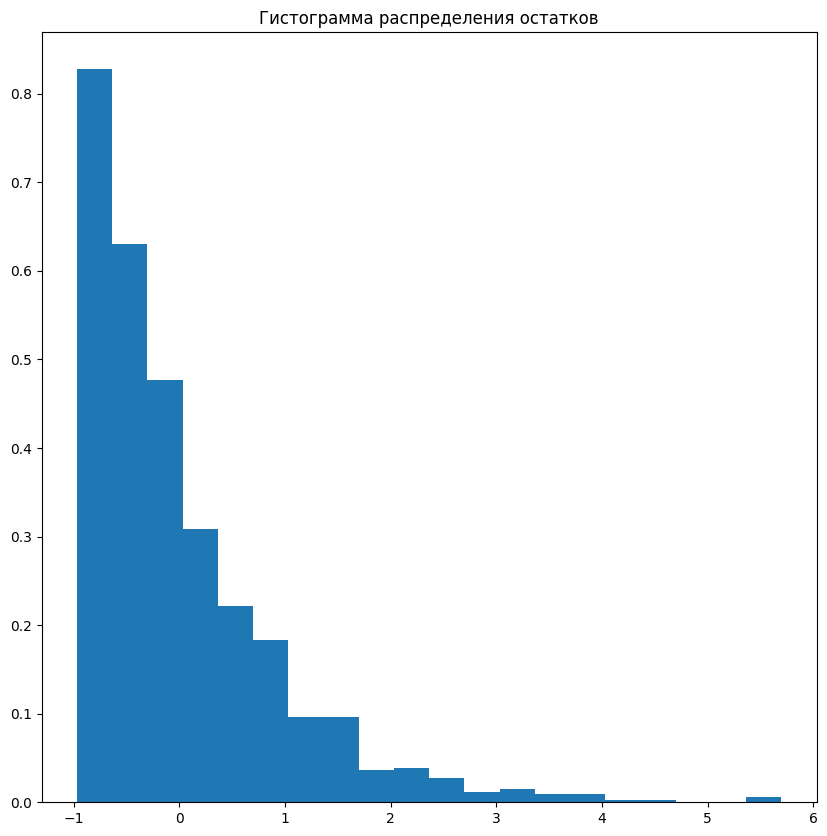

In [5]:



plt.figure(figsize = (10,10))
plt.title('Гистограмма распределения остатков')
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

## Критерий Колмогорова

In [6]:
smd.kstest_normal(res)


(np.float64(0.14602176431221248), np.float64(0.0009999999999998899))

## Критерий Андерсона-Дарлинга

In [7]:
smd.normal_ad(res)


(np.float64(45.818291716223484), 0.0)

## Критерии Жарке-Бера и Omnibus

In [8]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2604.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          2.15e-280
Time:                        12:23:25   Log-Likelihood:                -1332.8
No. Observations:                1000   AIC:                             2670.
Df Residuals:                     998   BIC:                             2680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8526      0.058     83.603      0.000       4.739       4.966
x              1.0257      0.020     51.028      0.000       0.986       1.065
==============================================================================
Omnibus:                      410.480   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1748.751
Skew:                           1.928   Prob(JB):                         0.00
Kurtosis:                       8.206   Cond. No.                         6.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Как можно побороть негауссовость остатков?

In [9]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.GLM(exog=X, endog=y2, family=sm.families.Gamma()).fit()

model.summary()

/Users/mszekhov/Desktop/current_projects/psmo/venv/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                   Gamma   Df Model:                            1
Link Function:           InversePower   Scale:                        0.017791
Method:                          IRLS   Log-Likelihood:                -1333.2
Date:                Fri, 22 Nov 2024   Deviance:                       16.070
Time:                        12:23:25   Pearson chi2:                     17.8
No. Iterations:                     6   Pseudo R-squ. (CS):             0.8949
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.001    139.211      0.000       0.185       0.190
x1            -0.0188      0.000    -47.182      0.000      -0.020      -0.018
==============================================================================
"""

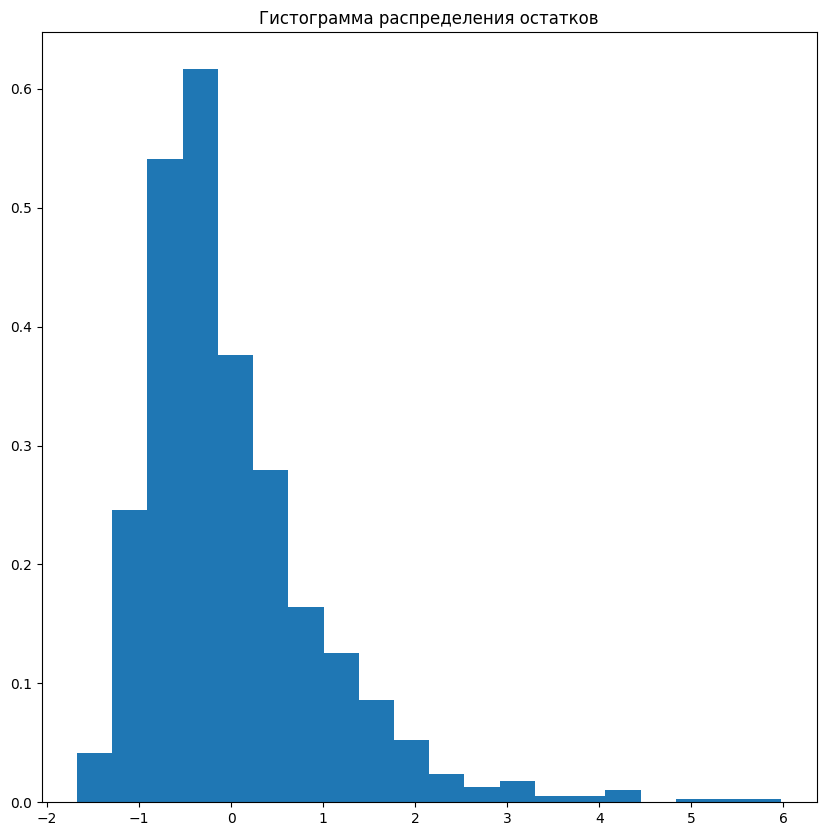

In [10]:
res = model.resid_response
counts, bins = np.histogram(res, bins=20, density=True)

plt.figure(figsize = (10,10))
plt.title('Гистограмма распределения остатков')
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

In [11]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Гетероскедастичность

Рассмотрим линейную регрессионную модель

$$y_i = 10+2x_i+\varepsilon_i$$

$$x_i \sim N(100, 16)$$

$$\varepsilon_i \sim N(0,x_i^2)$$

Сгенерируем выборку размера $n=50$. Оценим модель с помощью МНК.

In [20]:
x = np.random.normal(loc=15, scale=4.0, size=1000)
eps = np.random.normal(loc=0.0, scale=x**2, size=1000)
y = 10+2*x+eps

**Последствия гетероскедастичности**

Если предположение об одинаковых дисперсиях ошибок не
выполняется, то
* стандартные ошибки коэффициентов регрессии вычисляются
по неверным формулам
* t – тесты для проверки гипотез о конкретных значениях
коэффициентов не дают правильных результатов
* F – тесты для проверки гипотез о линейных ограничениях на
коэффициенты регрессии не дают правильных результатов
* Оценки МНК коэффициентов регрессии теряют эффективность.

In [21]:
data = pd.DataFrame(np.vstack([x, y]).T, columns=['x', 'y'])
data.head()
model = smf.ols(data=data, formula='y ~ x').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1414
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.707
Time:                        12:24:47   Log-Likelihood:                -6994.1
No. Observations:                1000   AIC:                         1.399e+04
Df Residuals:                     998   BIC:                         1.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.9329     32.684      0.885      0.376     -35.204      93.070
x              0.8047      2.140      0.376      0.707      -3.394       5.003
==============================================================================
Omnibus:                       63.497   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.416
Skew:                          -0.169   Prob(JB):                     5.61e-51
Kurtosis:                       5.332   Cond. No.                         60.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

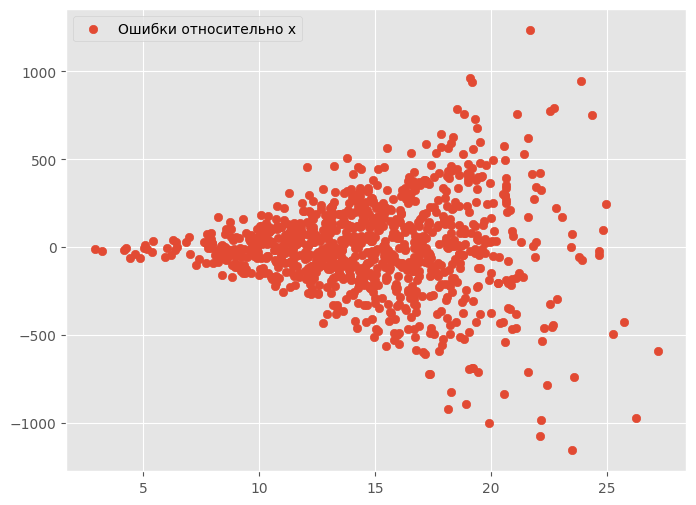

In [22]:

plt.figure(figsize=(8, 6))
plt.scatter(x, model.resid, label='Ошибки относительно x')
plt.legend()
plt.show()

Визуально при взвешивании наблюдений изменился лишь угол наклона для независимой переменной, ну и в конце выборки значения стали чуть ближе к линии

In [23]:
model2 = sm.WLS(y, x, weights=1/np.abs(model.resid)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.180
Model:                            WLS   Adj. R-squared (uncentered):              0.179
Method:                 Least Squares   F-statistic:                              219.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                    4.54e-45
Time:                        12:24:50   Log-Likelihood:                         -6394.3
No. Observations:                1000   AIC:                                  1.279e+04
Df Residuals:                     999   BIC:                                  1.280e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7747      0.187     14.821      0.000       2.407       3.142
==============================================================================
Omnibus:                      283.735   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.971
Skew:                          -0.105   Prob(JB):                     3.83e-11
Kurtosis:                       1.948   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Если мы не хотим строить модель и нам нужно только проверить значимость коэффициентов, можно просто скорректировать дисперсии через  оценки HCO-HC3.

# Пример 1

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/FUlyankin/matstat-AB/main/week13_linreg/data/Advertising.csv', index_col=0)
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


__Описание колонок:__

- `Sales` - продажи продукта на данном рынке (в тысячах штук)
- `TV` -  доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- `Radio` - доллары, потраченные на радио рекламу
- `Newspaper` - доллары, потраченные на рекламу в газетах

В нашей выборке мы имеем 200 **наблюдений** (200 разных рынков с разным объёмом рекламы)

## Вопросы

Давайте представим, что мы работаем на компанию, которая производит и продает этот товар. Компания может задать нам вопрос: как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:

1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке, можем ли мы предсказать продажи?

# 1. Парная регрессия в уровнях

Взглянем как продажи зависят от типов рекламы.

/Users/mszekhov/Desktop/current_projects/psmo/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


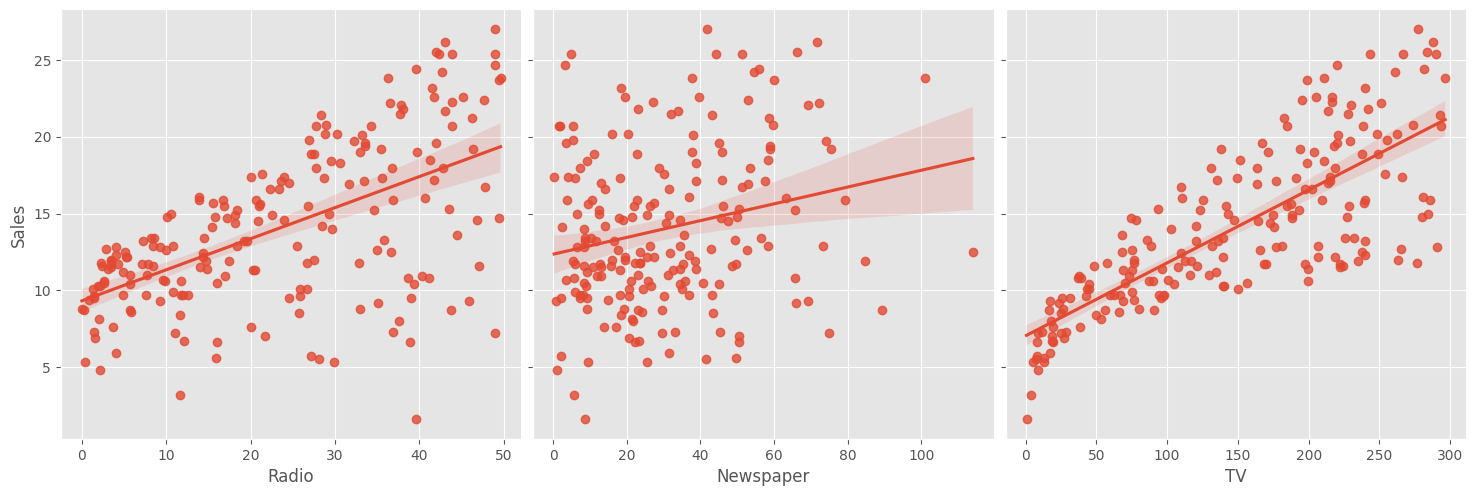

In [17]:
sns.pairplot(
    df,
    y_vars='Sales',
    x_vars=['Radio', 'Newspaper', 'TV'],
    size=5,
    kind='reg',
    diag_kind=None
);

Для начала давайте поговорим только про рекламу на TV. Оценим параметры модели

$$
Sales_i = \beta_0 + \beta_1 \cdot TV_i + \varepsilon_i
$$

In [18]:
import statsmodels.formula.api as smf

model = smf.ols('Sales ~ TV', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        09:53:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [19]:
res.params

Intercept    7.032594
TV           0.047537
dtype: float64

- Переменная $TV$ значима, так как $p$-значение для проверки гипотезы о том, что она равна нулю оказалось очень маленьким, наблюдаемое значение статистики $17.668$. Оно лежит глубоко в хвосте нашего распределения.
- Получившееся уравнение

$$
Sales_i = 7.033 + 0.047 \cdot TV_i
$$

можно проинтерпретировать так, что каждые дополнительные $1000$ долларов, потраченные на рекламу по телевизору, увеличивают продажы на $47.537$ товаров.

> Мы можем так интерпретировать значение коэффициента, если выполняются предпослыки линейной регрессии. Например, первая предпослыка говорит о том, что мы должны были верно специфицировать модель.

Если модель специфицирована неверно, у нас есть проблемы.

> Мы получаем корректные оценки стандартных ошибок в ситуации, когда ошибки независимо одинаково распределены с одинаковой дисперсией. Если это не так, оценки ошибок искажены.

## 2. Парная регрессия в логарифмах

У нашей модели явно есть проблемы со спецификацией. Давайте попробуем их исправить. Если взглянуть на график того, как между собой взаимосвязаны реклама по TV и продажи, можно заметить нелинейную зависимость, похожую на логарифмическую.

/Users/mszekhov/Desktop/current_projects/psmo/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


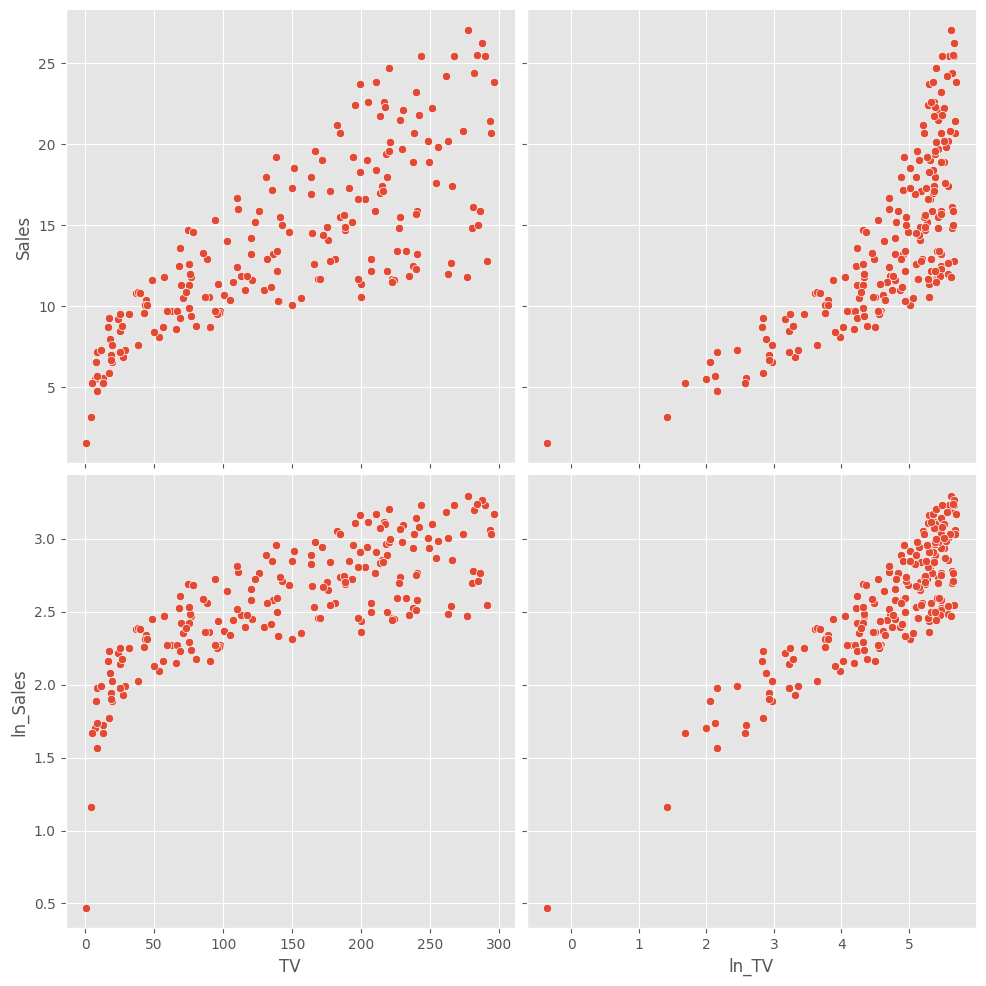

In [20]:
df['ln_TV'] = df['TV'].apply(np.log)
df['ln_Sales'] = df['Sales'].apply(np.log)

sns.pairplot(
    df,
    y_vars=['Sales', 'ln_Sales'],
    x_vars=['TV', 'ln_TV'],
    size=5,
    diag_kind=None
);


Очистим данные от выбросов.

In [21]:
df = df[df.Sales > df.Sales.quantile(0.01)]

Оценим параметры модели

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \varepsilon_i
$$

In [22]:
import statsmodels.formula.api as smf

model = smf.ols('ln_Sales ~ ln_TV', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     435.1
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.16e-51
Time:                        09:53:31   Log-Likelihood:                 29.332
No. Observations:                 198   AIC:                            -54.66
Df Residuals:                     196   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9757      0.078     12.443      0.0

Переменная снова значима. $R^2$ подрос. Все коэффициенты в моделях, где целевые и объясняющие переменные взяты в логарифмах, интерпретируются в процентных изменениях. Например, коэффициент $0.3550$ можно проинтерпретировать как то, на сколько процентов увеличутся продажи, при изменении трат на рекламу по телевизору на $1\%$.

## 3. Множественная регрессия

Оценим уравнение

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \beta_2 \cdot Radio_i + \beta_3 \cdot Newspaper_i + \varepsilon_i
$$

In [23]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2959.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.17e-161
Time:                        09:53:31   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.022     30.446      0.0

$F_{st} = \frac{R^{2}/(k-1)}{(1-R^{2}/(n-k)}$
k количество параметров в линейной регрессии.

- Уравнение значимо в целом, значение F-статистики попадает глубоко в хвост
- Коэффициент перед `Newspaper` отрицательный и незначимый

> Если модель специфицирована верно и выполнены все предпосылки, мы можем сделать вывод, что траты на рекламу в газетах никак не повышают продажи и от них можно отказаться

## 4. Проверка предпосылок модели

- Есть ли мультиколинеарность?(линейная зависимость признаков)


In [24]:
df[['ln_TV', 'Radio', 'Newspaper']].corr()

,ln_TV,Radio,Newspaper
ln_TV,1.000000,0.004521,-0.004387
Radio,0.004521,1.000000,0.358916
Newspaper,-0.004387,0.358916,1.000000


Между переменными нет высокой корреляции. Значит у нас получится корректно оценить нашу модель. Есть другие, более формальне критерии для поиска проблем, связанных с мультиколинеарностью, но мы про них говорить не будем.

- Корректны ли данные, с которыми мы работаем, для решения поставленной задачи?
- Корректна ли спецификация модели?
- Есть ли выборосы?

Про всё это мы поговорили выше. Судя по всему, оценки коэффициентов, которые мы получили - несмещённые и состоятельные.

- Есть ли в остатках __гетероскедастичность__?

Для гетероскедастичности построим картинку и воспользуемся каким-нибудь критерием.

/Users/mszekhov/Desktop/current_projects/psmo/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


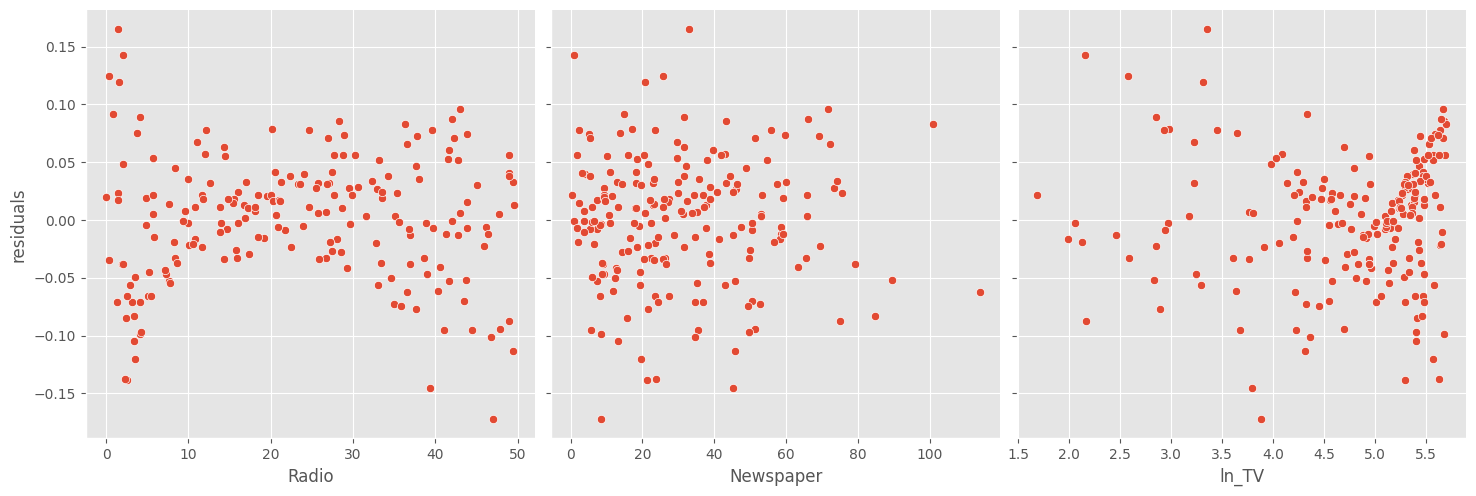

In [26]:
df['residuals'] = res.resid

sns.pairplot(
    df,
    y_vars='residuals',
    x_vars=['Radio', 'Newspaper', 'ln_TV'],
    size=5,
    diag_kind=None
);

Судя по графику, дисперсия ошибок зависит от объёма рекламы по радио. Причём квадратично. Выходит, что оценки дисперсий коэффициентов искажены и доверительные интервалы оказываются смещёнными. Можно провести формальный тест на гомоскедастичность. Таких тестов есть довольно много.

[Breuch Pagan test](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%91%D1%80%D0%BE%D0%B9%D1%88%D0%B0_%E2%80%94_%D0%9F%D0%B0%D0%B3%D0%B0%D0%BD%D0%B0)

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, sm.add_constant(df[['ln_TV', 'Radio', 'Newspaper']]).values)

(np.float64(6.538916813631199),
 np.float64(0.08814029149221943),
 np.float64(2.208542576438612),
 np.float64(0.08842044053086531))

Видим, что `pvalue` пограничен. Гипотеза о гомоскедастичности не отвергается, но не для всех уровней значимости. Здесь лучше полагаться не только на результаты тестов, но и на визуальный анализ и здравый смысл. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели.

In [28]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data=df)
res = model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1807.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.85e-141
Time:                        09:55:03   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.029     23.108      0.0

Значения стандартных ошибок изменились. Теперь мы можем использовать их для проверки гипотез.

> Нормальность остатков нам не нужна. Из-за корректировки ошибок мы можем пользоваться только асимптотическими результатами. В данных нет выбросов, поэтому предельные теоремы тут работают.

## 5. Выводы:

1. Тратить деньги на рекламу в газетах неэффективно. Гипотеза о том, что коэффициент перед этой переменной равен нулю, не отвергается.
2. Реклама по телевидению обладает убывающей отдачей от масштаба. Коэффициент перед логарифмом получился меньше единицы. Этот канал оказывается в плане рекламы самым эффективным.
3. Канал, связанный с радио, судя по всему, недоиспользуется. Здравый смысл и микроэкономика подсказывают, что от него тоже логично ожидать убывающую от масштаба отдачу. Однако в данных мы видим, что она линейная.

[Как интерпретировать summary in statmodeels.ols](https://habr.com/ru/articles/681218/)

# Уравнения Минцера для заработной платы

Mincer equation: https://en.wikipedia.org/wiki/Mincer_earnings_function


A panel of 595 individuals from 1976 to 1982, taken from the Panel Study of Income Dynamics (PSID).

The data are organized as a stacked time series/balanced panel, see Examples on how to convert to a pdata.frame.

### Data Frame Description

This dataset contains information about 4165 observations, each representing an individual from the United States. The variables are as follows:

| **Variable** | **Description** |
|--------------|-----------------|
| **exp**      | Years of full-time work experience |
| **wks**      | Weeks worked |
| **bluecol**  | Is the individual a blue-collar worker? |
| **ind**      | Does the individual work in a manufacturing industry? |
| **south**    | Does the individual reside in the South? |
| **smsa**     | Does the individual reside in a Standard Metropolitan Statistical Area? |
| **married**  | Is the individual married? |
| **sex**      | Gender (factor with levels "male" and "female") |
| **union**    | Is the individual's wage set by a union contract? |
| **ed**       | Years of education |
| **black**    | Is the individual Black? |
| **lwage**    | Logarithm of wage |

### Details
- **Total number of observations**: 4165
- **Observation**: Individuals
- **Country**: United States


In [ ]:
data = pd.read_excel('data/seminar_09_mincers.xlsx')
data.head()

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
1,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
2,5,40,no,0,yes,no,yes,male,no,9,no,5.99645
3,6,39,no,0,yes,no,yes,male,no,9,no,5.99645
4,7,42,no,1,yes,no,yes,male,no,9,no,6.06146


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
sns.set_theme()

<Axes: xlabel='exp', ylabel='lwage'>

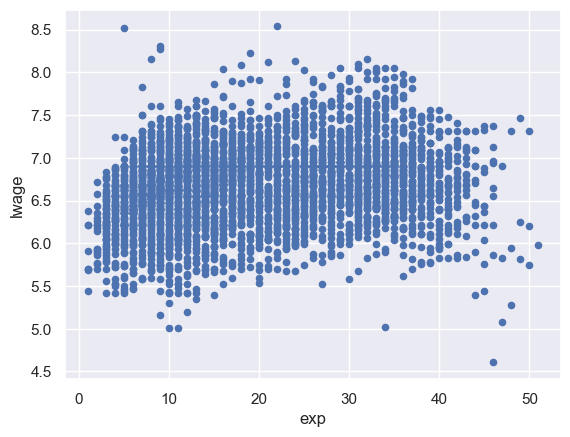

In [42]:
data.plot(x = 'exp', y = 'lwage', kind = 'scatter')


<Axes: xlabel='ed', ylabel='lwage'>

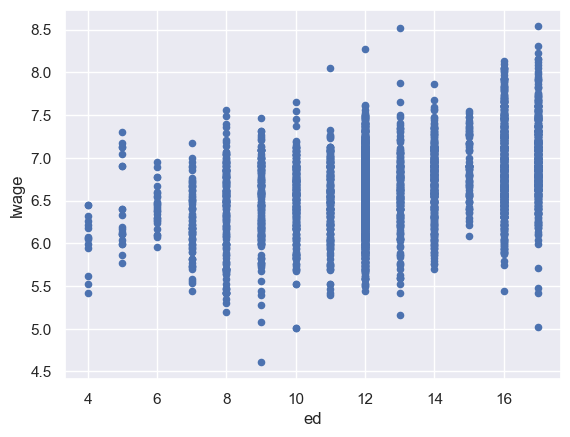

In [43]:
data.plot(x = 'ed', y = 'lwage', kind = 'scatter')

In [44]:
data['const'] = 1

reg1 = sm.OLS(endog=data['lwage'], exog=data[['const', 'exp']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [45]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.81e-42
Time:                        23:33:40   Log-Likelihood:                -2595.5
No. Observations:                4165   AIC:                             5195.
Df Residuals:                    4163   BIC:                             5208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5014      0.014    449.439      0.0

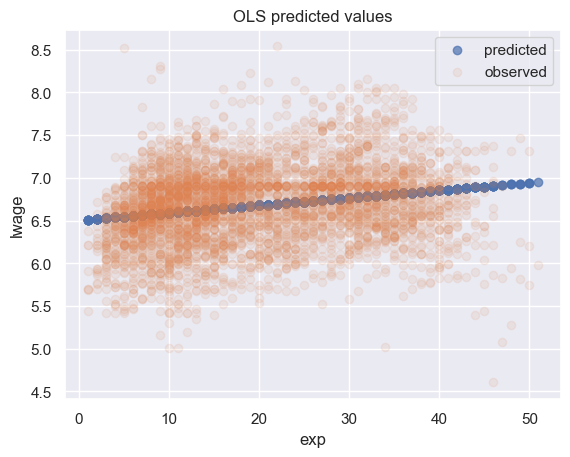

In [56]:
# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(data['exp'], results.predict(), alpha=0.7,
        label='predicted')

# Plot observed values

ax.scatter(data['exp'], data['lwage'], alpha=0.1,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('exp')
ax.set_ylabel('lwage')
plt.show()

Давайте расширим нашу модель на бОльшее число регрессоров. Для этого создадим списки регрессоров для каждой версии модели.

In [100]:
data['expsq'] = data['exp']**2



In [101]:
X1 = ['const', 'exp']
X2 = ['const', 'exp', 'ed']
X3 = ['const', 'exp', 'expsq', 'ed']

data

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,...,not_married,y_married,female,male,not_married,y_married,female,male,not_married,y_married
0,3,32,no,0,yes,no,yes,male,no,9,...,0,1,0,1,0,1,0,1,0,1
1,4,43,no,0,yes,no,yes,male,no,9,...,0,1,0,1,0,1,0,1,0,1
2,5,40,no,0,yes,no,yes,male,no,9,...,0,1,0,1,0,1,0,1,0,1
3,6,39,no,0,yes,no,yes,male,no,9,...,0,1,0,1,0,1,0,1,0,1
4,7,42,no,1,yes,no,yes,male,no,9,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,3,50,no,0,no,yes,no,female,no,12,...,1,0,1,0,1,0,1,0,1,0
4161,4,49,no,0,no,yes,no,female,no,12,...,1,0,1,0,1,0,1,0,1,0
4162,5,50,no,0,no,yes,no,female,no,12,...,1,0,1,0,1,0,1,0,1,0
4163,6,50,no,0,no,yes,no,female,no,12,...,1,0,1,0,1,0,1,0,1,0


In [105]:
#OLS regression for each set of vars

reg1 = sm.OLS(data['lwage'], data[X1], missing='drop').fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.81e-42
Time:                        00:13:32   Log-Likelihood:                -2595.5
No. Observations:                4165   AIC:                             5195.
Df Residuals:                    4163   BIC:                             5208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5014      0.014    449.439      0.0

In [106]:
reg2 = sm.OLS(data['lwage'], data[X2], missing='drop').fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     681.6
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          9.06e-257
Time:                        00:14:02   Log-Likelihood:                -2098.8
No. Observations:                4165   AIC:                             4204.
Df Residuals:                    4162   BIC:                             4223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4359      0.034    158.391      0.0

In [107]:
reg3 = sm.OLS(data['lwage'], data[X3], missing='drop').fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     537.7
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          2.47e-295
Time:                        00:14:08   Log-Likelihood:                -2006.5
No. Observations:                4165   AIC:                             4021.
Df Residuals:                    4161   BIC:                             4046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1810      0.038    135.063      0.0

In [108]:
reg4 = smf.ols("lwage ~ exp + expsq + ed + C(sex) + C(married)", data = data).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          1.39e-169
Time:                        00:14:18   Log-Likelihood:                -2293.6
No. Observations:                4165   AIC:                             4597.
Df Residuals:                    4160   BIC:                             4629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.8722      0.03

In [109]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'exp',
                                             'expsq',
                                             'ed',
                                             'sex',
                                            'married'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

             Table 2 - OLS Regressions
                  Model 1 Model 2 Model 3  Model 4 
---------------------------------------------------
const             6.50*** 5.44*** 5.18***          
                  (0.01)  (0.03)  (0.04)           
exp               0.01*** 0.01*** 0.05***  0.04*** 
                  (0.00)  (0.00)  (0.00)   (0.00)  
expsq                             -0.00*** -0.00***
                                  (0.00)   (0.00)  
ed                        0.08*** 0.08***          
                          (0.00)  (0.00)           
C(married)[T.yes]                          0.07*** 
                                           (0.02)  
C(sex)[T.male]                             0.38*** 
                                           (0.03)  
Intercept                                  5.87*** 
                                           (0.03)  
R-squared         0.04    0.25    0.28     0.17    
R-squared Adj.    0.04    0.25    0.28     0.17    
R-squared         0.04   